In [1]:
import pandas as pd
import requests
import os
from bs4 import BeautifulSoup
from time import sleep
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import warnings

# 경고 메시지 생략(무시)
warnings.filterwarnings('ignore')

# 그래프에서 한글처리 문제 해결
font_path = 'malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

# 그래프에서 음수(minus) 기호 문제 해결
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_excel('excel/남북한_발전전력량.xlsx')
df2 = df.loc[[1, 2]]
df2 = df2.drop('남북한별', axis = 'columns')
df2 = df2.rename({'발전 전력별':'전력별'}, axis = 'columns')
df2 = df2.set_index('전력별')
df2_T = df2.T
df2_T['수력'] = df2_T['수력'].astype(int)
df2_T['화력'] = df2_T['화력'].astype(int)
df2_T.index = df2_T.index.astype(int)
df2_T

전력별,수력,화력
1990,156,121
1991,150,113
1992,142,105
1993,133,88
1994,138,93
1995,142,88
1996,125,88
1997,107,86
1998,102,68
1999,103,83


In [3]:
df = pd.read_excel('excel/남북한_발전전력량.xlsx')
df2 = df.loc[[1, 2], '1990':'2016']
df2 = df2.rename({1:'수력', 2:'화력'}, axis = 'index')
df2_T = df2.T
df2_T['수력'] = df2_T['수력'].astype(int)
df2_T['화력'] = df2_T['화력'].astype(int)
df2_T.index = df2_T.index.astype(str)

df2_T['합계'] = df2_T['수력'] + df2_T['화력']
df2_T['합계-1년'] = df2_T['합계'].shift(1)
df2_T['증감률'] = ((df2_T['합계'] - df2_T['합계-1년']) / df2_T['합계-1년']) * 100
df2_T.head(3)

,수력,화력,합계,합계-1년,증감률
1990,156,121,277,NaN,NaN
1991,150,113,263,277.0,-5.054152
1992,142,105,247,263.0,-6.083650


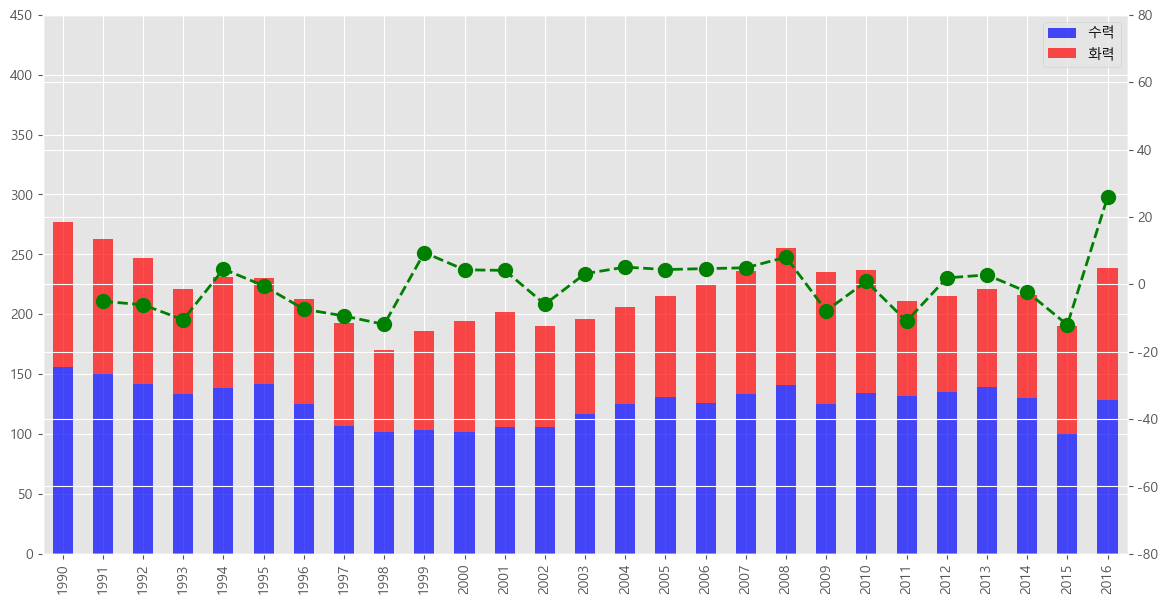

In [4]:
plt.style.use('ggplot')

ax1 = df2_T[['수력', '화력']].plot(kind = 'bar', figsize = (14, 7), stacked = True,
                                   color = ['blue', 'red'], alpha = 0.7)
ax2 = ax1.twinx()
ax2.plot(df2_T['증감률'], ls = '--', marker = 'o', color = 'green', linewidth = 2,
         markersize = 10)
ax1.set_ylim(0, 450)
ax2.set_ylim(-80, 80)
plt.show()

<Axes: xlabel='weight', ylabel='mpg'>

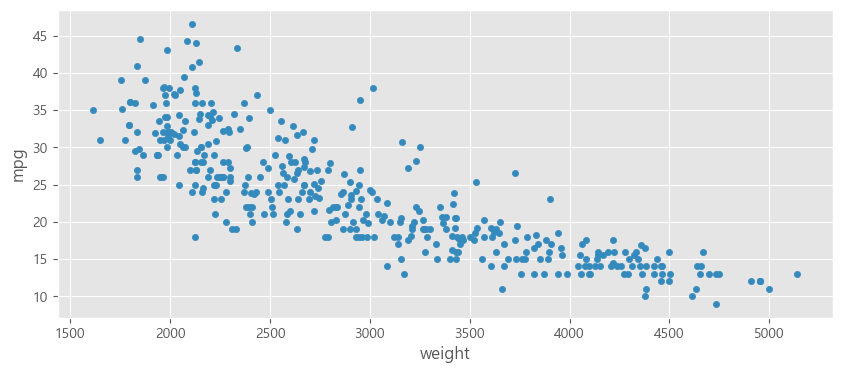

In [5]:
car = pd.read_csv('csv/auto-mpg.csv')
car.plot(kind = 'scatter', x = 'weight', y = 'mpg', figsize = (10, 4))

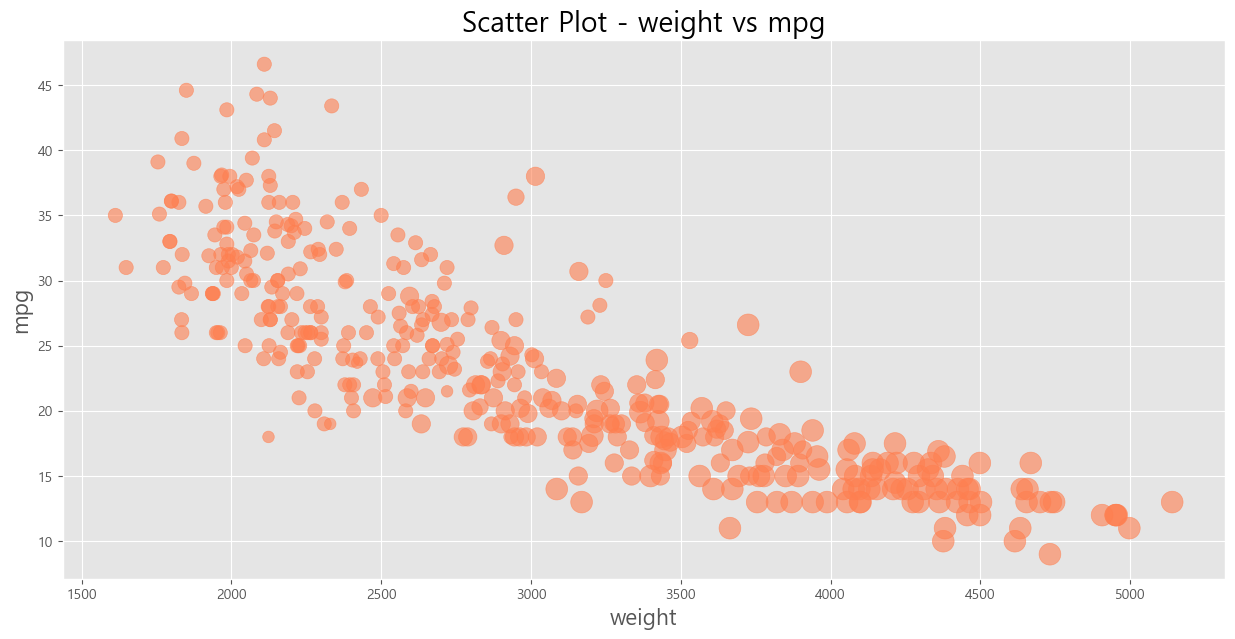

In [8]:
cyl_size = (car['cylinders'] - 1) * 35

plt.figure(figsize = (15, 7))
plt.scatter(x = car['weight'], y = car['mpg'], c = 'coral',s = cyl_size, alpha = 0.6)
plt.xlabel('weight', size = 16)
plt.ylabel('mpg', size= 16)
plt.title('Scatter Plot - weight vs mpg', size = 20)
plt.show()

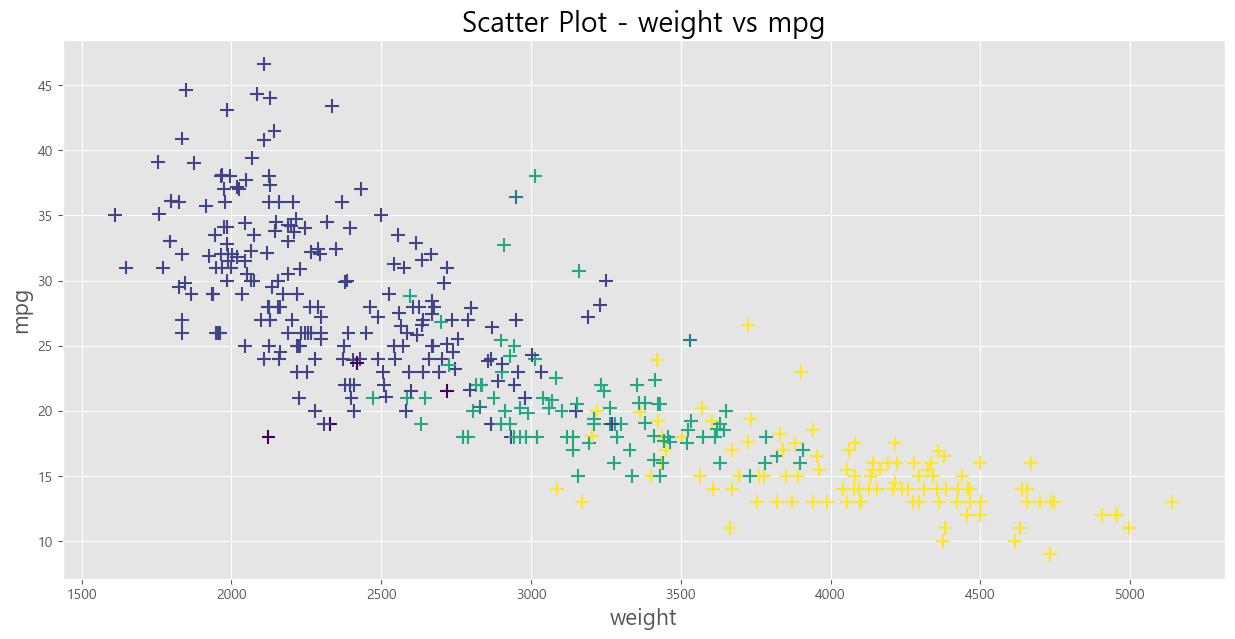

In [9]:
cyl_size = (car['cylinders'] - 1) * 35

plt.figure(figsize = (15, 7))
plt.scatter(x = car['weight'], y = car['mpg'], marker = '+', s = 100,
            cmap = 'viridis', c = cyl_size)            
plt.xlabel('weight', size = 16)
plt.ylabel('mpg', size= 16)
plt.title('Scatter Plot - weight vs mpg', size = 20)
plt.show()

In [18]:
car2 = car.copy()
car2['count'] = 1
car2.groupby('origin')['count'].sum() / len(car2.index)

origin
1    0.625628
2    0.175879
3    0.198492
Name: count, dtype: float64

In [25]:
car_origin = car['origin'].value_counts()
car_origin = car_origin.rename({1:'USA', 2:'EU', 3:'JPN'})
car_origin

origin
USA    249
JPN     79
EU      70
Name: count, dtype: int64

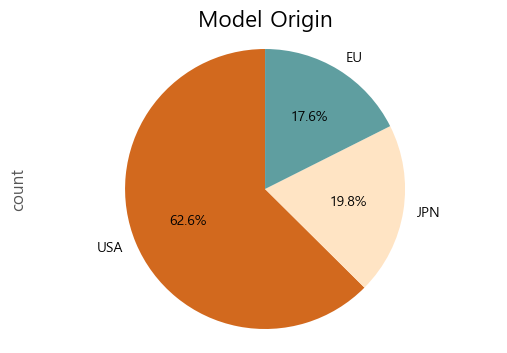

In [37]:
car_origin.plot(kind = 'pie', autopct = '%.1f%%', figsize = (6, 4),
                startangle = 90, colors = ['chocolate', 'bisque', 'cadetblue'])
plt.title('Model Origin', size = 16)
plt.axis('equal')
plt.show()

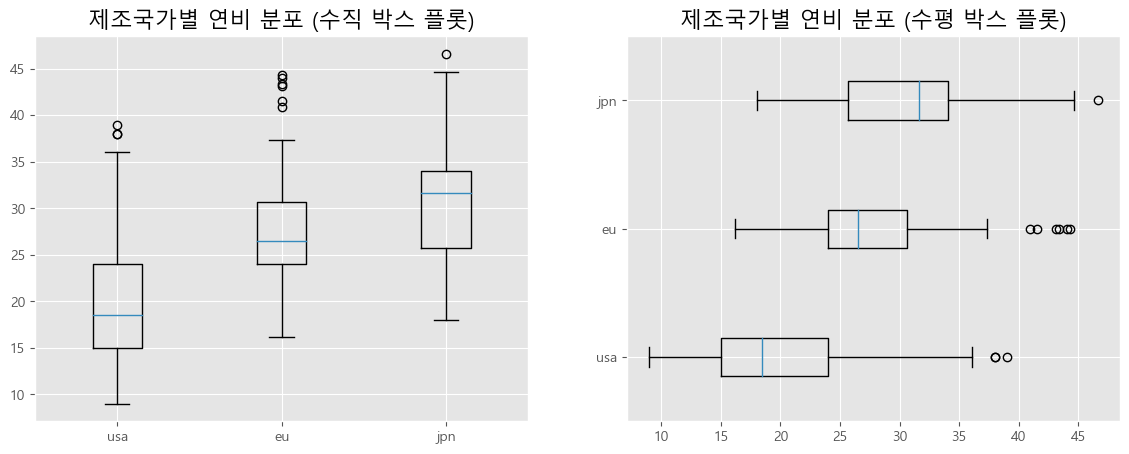

In [55]:
# mpg 컬럼을 국가(대륙,origin)별로 나누어 목록화
mpg_usa = car['mpg'][car['origin'] == 1]
mpg_eu  = car['mpg'][car['origin'] == 2]
mpg_jpn = car['mpg'][car['origin'] == 3]
mpg_list = [mpg_usa, mpg_eu, mpg_jpn]

figure = plt.figure(figsize = (14, 5))

ax1 = figure.add_subplot(1, 2, 1)
ax2 = figure.add_subplot(1, 2, 2)

ax1.boxplot(x = mpg_list, vert = True , labels = ['usa', 'eu', 'jpn'])
ax2.boxplot(x = mpg_list, vert = False, labels = ['usa', 'eu', 'jpn'])

ax1.set_title('제조국가별 연비 분포 (수직 박스 플롯)', size = 16)
ax2.set_title('제조국가별 연비 분포 (수평 박스 플롯)', size = 16)

plt.show()

In [56]:
mpg_usa = car['mpg'][car['origin'] == 1]
mpg_eu  = car['mpg'][car['origin'] == 2]
mpg_jpn = car['mpg'][car['origin'] == 3]
mpg_list = [mpg_usa, mpg_eu, mpg_jpn]

In [65]:
car['origin'] = car['origin'].astype('category')
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    398 non-null    object  
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model year    398 non-null    int64   
 7   origin        398 non-null    category
 8   car name      398 non-null    object  
dtypes: category(1), float64(3), int64(3), object(2)
memory usage: 25.5+ KB
